In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
### read in from NetCDF
datastr = './u28_T005/'
fname = '%sISOBL_model_output.nc'% datastr
# '/u07_T005/'
# '/u14_T005/'
# '/u28_T005/'
# '/u07_T01/'
# '/u14_T01/'
# '/u28_T01/'
# '/u07_T05/'
# '/u14_T05/'
# '/u28_T05/'
    
ds = xr.open_dataset(fname)

ymax = 4.2
tmax = 3
f = 1.37e-4 # coriolis frequency f = 2.74e-4 for u2.8 cases
T = 2*np.pi/f # inertial period
time  = ds.t-ds.t[0]
y = ds.y

'9.8 [m/s^2]'

Text(0.5, 0, '$t$ (h)')

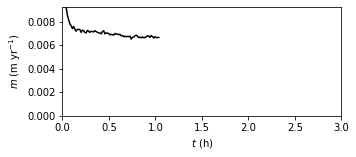

In [4]:
## Meltrate
# parameters from simulations
nu = 2.0e-6 #molecular viscosity (m^2 s^-1)
Pr = 14 #Prandtl number (dimensionles)
L = 3.35e5 # Latent heat of melting (units)
cp = 4.184e3 # Heat capacity of the ocean (units)
sy = 365*24*3600

# Calculate melt rate
dtdz = (ds.Temp[:,1]-ds.Temp[:,0])/(ds.y[1]-ds.y[0])
V = -(cp/L)*(nu/Pr)*(1/0.92)*dtdz*sy
meltrate = -V

# Plotting
f, ax = plt.subplots(1,1) 
f.set_size_inches(5, 2)
ax.plot(time/T, meltrate,'-k')
ax.axis([0, tmax,  0 , max(meltrate[3:-1])])
ax.set_ylabel("$m$ (m yr$^{-1}$)")
ax.set_xlabel('$t$ (h)')

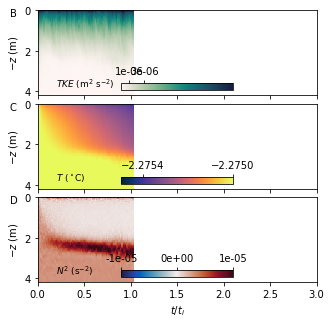

In [5]:
# Hovmoller plots
f, ax = plt.subplots(3,1) 
f.set_size_inches(5, 5)
f.subplots_adjust(hspace=0.1, wspace=0.25)

axins0 = inset_axes(ax[0], width="40%",height="8%",loc='lower center')
axins1 = inset_axes(ax[1], width="40%",height="8%",loc='lower center')
axins2 = inset_axes(ax[2], width="40%",height="8%",loc='lower center')

tkemax = 0.8*max(ds.TKE[60,10:-1])

ch = ax[0].pcolor(time/T, y, ds.TKE.transpose(), cmap=cmo.tempo,  vmin=1e-8, vmax =tkemax)
ci = ax[1].pcolor(time/T, y, ds.Temp.transpose(), cmap=cmo.thermal,  vmin=np.min(ds.Temp[60,10:-1]), 
                  vmax =np.max(ds.Temp[60,10:-1]))
cj = ax[2].pcolor(time/T, y, ds.N2.transpose(), cmap=cmo.balance, vmin = -1e-5, vmax =1e-5)

ax[0].axis([0, tmax, ymax, 0 ])
ax[0].set_ylabel("$-z$ (m)")
ax[0].set_xticklabels([''])

ax[1].axis([0, tmax, ymax, 0 ])
ax[1].set_ylabel("$-z$ (m)")
ax[1].set_xticklabels([''])

ax[2].axis([0, tmax, ymax, 0 ])
ax[2].set_ylabel("$-z$ (m)")
ax[2].set_xlabel('$t/t_i$')

ax[0].text(tmax/15, 0.9*ymax,'$TKE$ (m$^2$ s$^{-2}$)', fontsize=9)
ax[1].text(tmax/15, 0.9*ymax, '$T$ ($^\circ$C)', fontsize=9)
ax[2].text(tmax/15, 0.9*ymax, '$N^2$ (s$^{-2}$)', fontsize=9)

ax[0].text(-tmax/10,0.3,'B')
ax[1].text(-tmax/10,0.3,'C')
ax[2].text(-tmax/10,0.3,'D')

# Tidy plots
f.colorbar(ch, cax=axins0, orientation="horizontal",  format='%.0e', ticks = [1e-6, 3e-6] )
axins0.xaxis.set_ticks_position("top")
cb = f.colorbar(ci, cax=axins1, orientation="horizontal" , ticks=[-2.2754, -2.2750])
axins1.xaxis.set_ticks_position("top")
f.colorbar(cj, cax=axins2, orientation="horizontal",  format='%.0e')
axins2.xaxis.set_ticks_position("top")

f.savefig('hovmoller.png', dpi=280, format='png',bbox_inches='tight')